In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
print(tf.__version__)

2.1.0


In [43]:
fashion_mnist = keras.datasets.fashion_mnist

In [44]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [45]:
train_images.shape

(60000, 28, 28)

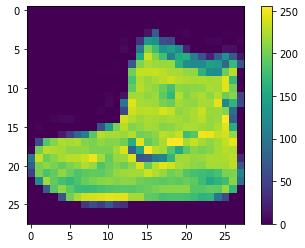

In [46]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

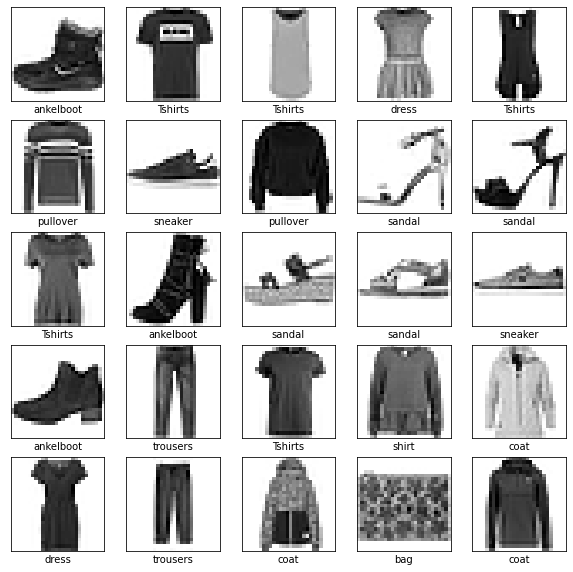

In [62]:
plt.figure(figsize = (10,10))
for i in range(25) :
    plt.subplot(5,5,(i+1))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i] , cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [63]:
test_images.shape

(10000, 28, 28)

In [18]:
class_names = ['Tshirts' , 'trousers' , 'pullover', 'dress', 'coat', 'sandal','shirt', 'sneaker', 'bag', 'ankelboot' ]

In [64]:
train_images = train_images/255.0
test_images = test_images/255.0

In [65]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation =  tf.nn.relu),
    keras.layers.Dense(10,activation = tf.nn.softmax)
])

In [66]:
model.compile(optimizer = 'adam' , 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [67]:
model.fit(train_images , train_labels , epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4972 - accuracy: 0.8250
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3744 - accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3359 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3106 - accuracy: 0.8864
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2929 - accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2772 - accuracy: 0.8981
Epoch 7/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2656 - accuracy: 0.9019
Epoch 8/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2561 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2458 - accuracy: 0.9081
Epoch

In [68]:
test_loss , test_acc = model.evaluate(test_images , test_labels)
print('Test accuracy : ',test_acc)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.3179 - accuracy: 0.8879
Test accuracy :  0.8879


In [69]:
predictions = model.predict(test_images)

In [29]:
predictions[1]

array([2.0908356e-05, 7.7944714e-13, 9.9480867e-01, 8.1368770e-09,
       1.6602279e-03, 8.6598457e-16, 3.5101268e-03, 4.9181941e-19,
       4.6967003e-11, 4.8274499e-11], dtype=float32)

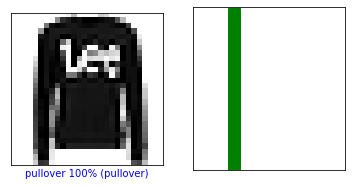

In [144]:
i = 1
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

In [138]:
def plot_image(i, predictions_array, true_label , img):
    predictions_array,true_label, img =predictions_array[i] , true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label ==true_label :
        color = 'blue'
    else :
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color = color)

In [139]:
def plot_value_array(i,predictions_array, true_label):
    predictions_array,true_label = predictions_array[i] , true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array, color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [140]:
img = test_images[1]
img.shape

(28, 28)

In [141]:
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [142]:
predictions_single = model.predict(img)

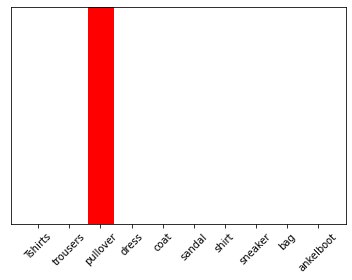

In [143]:
plot_value_array(0,predictions_single,test_labels)
plt.xticks(range(10),class_names,rotation = 45)
plt.show()